# Project: Wrangling and Analyze Data

In [1]:
# Importing all necessary libraries.
import pandas as pd
import numpy as np
import requests
import json
import os
import tweepy
import io
import warnings
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [2]:
#hiding all the warnings I might come across later on
warnings.filterwarnings('ignore')

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
# Loading the Twitter Archive Dataset using Pandas
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# Checking the information about each features in the dataset
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [5]:
# Checking each column in the dataset.
df_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [6]:
# Checking for the value count of Names of dogs in the dataset
df_archive['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Penny         10
Lola          10
Tucker        10
Bo             9
Winston        9
Sadie          8
the            8
an             7
Buddy          7
Toby           7
Daisy          7
Bailey         7
Stanley        6
Dave           6
Jack           6
Milo           6
Jax            6
Scout          6
Oscar          6
Leo            6
Rusty          6
Koda           6
Bella          6
Finn           5
            ... 
Lenox          1
Rodman         1
Rascal         1
Halo           1
Berkeley       1
Brandy         1
Edmund         1
Kaiya          1
River          1
Rumpole        1
Kuyu           1
Stewie         1
Noah           1
Ruffles        1
Ben            1
Grizz          1
Tater          1
Noosh          1
Sage           1
Bobby          1
Fiji           1
Kayla          1
Dallas         1
Philippe       1
Sprinkles      1
Ivar           1
Tino           1
his           

In [7]:
# Checking for Duplicate rows
df_archive[df_archive.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [8]:
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1054,742423170473463808,NaN,NaN,2016-06-13 18:27:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bell. She likes holding hands. 12/10 w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742423170...,12,10,Bell,None,None,None,None
2248,667866724293877760,NaN,NaN,2015-11-21 00:46:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shaggy. He knows exactly how to solve ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
739,780601303617732608,NaN,NaN,2016-09-27 02:53:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Hercules. He can have whatever he wants f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780601303...,12,10,Hercules,None,None,None,None
617,796387464403357696,NaN,NaN,2016-11-09 16:22:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Snicku. He's having trouble reading be...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796387464...,12,10,Snicku,None,None,None,None
418,822462944365645825,NaN,NaN,2017-01-20 15:17:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gabe. He was the unequivocal embodimen...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822462944...,14,10,Gabe,None,None,pupper,None


In [9]:
#getting the counts for all the ratings in the rating_numerator column
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [10]:
#the actual rating below should be 9.75 instead of 75
df_archive[df_archive.rating_numerator == 75]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None


In [11]:
##getting the counts for all the ratings in the rating_denominator column
df_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [12]:
#filtering out all the rows where the name is None
df_archive[df_archive.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [13]:
df_archive[df_archive.tweet_id == 667550882905632768] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2260,667550882905632768,NaN,NaN,2015-11-20 03:51:47 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,6.675484e+17,4.296832e+09,2015-11-20 03:41:59 +0000,https://twitter.com/dogratingrating/status/667...,5,10,None,None,None,None,None


On visually assessing the text column here in an Excel sheet, I found out that a lot of people were sending pictures of other animals or things to rate as well. So such tweets are invalid.

In [14]:
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

The source column, since it consists of urls, is a bit untidy with all the non-alphanumeric characters and thus a little difficult to read.

Let's move on to the image predictions table now.

In [15]:
list_column = ['tweet_id',]

In [16]:
df_archive.shape

(2356, 17)

In [17]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [18]:
# Download the image prediction file using the link provided to Udacity students
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(image_request.content)

335079

In [19]:
# Showing the data in the image predictions file
image_predict = pd.read_csv('image_predictions.tsv', sep = '\t')
image_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [20]:
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_predict['tweet_id']. value_counts().head(5)

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
Name: tweet_id, dtype: int64

In [22]:
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

# I set up an application where I got my consumer key and secret and on connecting it to my twitter account I got my access token and secret as well.

 Creating an api object by using the tweepy.API class, to query the twitter API :

In [23]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# Creating an api object by using the tweepy.API class, to query the twitter API:

In [24]:
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

 Creating a list of all the tweet ids in the twitter archives dataset :

In [25]:
tweet_ids_list = list(df_archive['tweet_id'])

 Getting access to the content of all the tweets by using tweepy's get_status method on their 
 respective ids and writing the json data of all those tweets to a text file with each tweet's json data on its own line :

In [26]:
del_tweet_ids = []
start_time = datetime.now()
with open('tweet_json.txt', 'a') as f:
    for tweet_id in tweet_ids_list:
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            json.dump( tweet._json, f)
            f.write('\n')
            print(tweet_id)
        except:
            del_tweet_ids.append(tweet_id)
            print(tweet_id)
time_elapsed = datetime.now() - start_time
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
888202515573088257
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270321602560
882268110199369728
882045870035

In [27]:
del_tweet_ids

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888202515573088257,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886366144734445568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 884162670584377345,
 883838122936631299,
 883482846933004288,
 883360690899218434,
 883117836046

Now that I know the tweet ids of all the tweets that don't exist anymore, I will put them in a list for further use :

In [28]:
# Creating a list for all the tweet ids
del_tweet_ids = ['888202515573088257', '873697596434513921', '869988702071779329', '866816280283807744', '861769973181624320',
                 '845459076796616705', '842892208864923648', '837012587749474308', '827228250799742977', '802247111496568832',
                 '775096608509886464']

Reading the text file I just created, line by line into an empty list. Also, since I am using the readline method here, each tweet's json is read into string form.

In [29]:
tweets_list = []
with open('tweet_json.txt') as f:
    for tweet_id in tweet_ids_list:
        if tweet_id not in del_tweet_ids:
            tweets_list.append(f.readline()) 

On checking out the tweets_list I found out that there were a few empty strings in there, so I removed
them by using some list comprehension :

In [30]:
tweets_list_updated = [i for i in tweets_list if i != '']

Creating a list of dictionaries with each tweet's id, retweet count and favourite count. Since each tweet's json is in string 
form, I need to convert them first by using the json.loads method.

In [31]:
count_list = []
for e in tweets_list_updated:
    tweet_id = json.loads(e)['id']
    retweet_count = json.loads(e)['retweet_count']
    favourite_count = json.loads(e)['favorite_count']
    count_list.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favourite_count': favourite_count})

In [32]:
tweet_counts = pd.DataFrame(count_list, columns = ['tweet_id', 'retweet_count', 'favourite_count'])

In [33]:
tweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
tweet_id           0 non-null object
retweet_count      0 non-null object
favourite_count    0 non-null object
dtypes: object(3)
memory usage: 0.0+ bytes


So on checking out the dataframe, 2345 tweet ids remain out of the 2356 ids which were originally there
in the twitter archives dataset.
Now that I have gathered all the datasets I need, 
I will have to assess each one of them to resolve some of the quality and tidiness issues in them.
A clean and properly structured dataset is vital for conducting good analysis.

# Assess

I will start with the twitter archives dataframe imported earlier.

In [34]:
#increasing the column width so that the whole text in the 'text' column is visible.
pd.set_option('display.max_colwidth', -1)

In [35]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


On using my first function only, I can see that a lot of columns here have NaN values.

In [36]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

There are a lot of columns here having more null values than non-null values and I don't even think if these columns will be of any use when it comes to conducting analysis or visualisations. Features like in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id aren't of much use here since all of them act as unique identifiers and we already have the tweet id column as the primary key here. This is actually a tidiness issue since these columns aren't really needed.

Also, tweet_id should be a string instead of an integer since I want it to be a primary key and anyways we won't be doing any calculations with it. The data type for the timestamp column should be datetime instead of string.

In [37]:
#filter out all the rows where retweeted_status_id is null
df_archive[- df_archive.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" re

This table lists out all the rows with retweets. These aren't really valid as they are duplicated tweets and we don't want retweets.

In [38]:
df_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


On checking out the duplicated values in the name feature its evident that maybe a lot of the dogs didn't have a name or that data got lost and got replaced by the default 'None'. Also there are a lot of irrelevant values in that column like 'a', 'quite', 'the' which clearly shows that the wrong text was extracted from the text column. This issue should come under the accuracy dimension of quality issues.

Also, the url for the tweet with tweet id 885518971528720385 seems to be broken as the page cannot be found.

In [39]:
df_archive.name.value_counts()

None         745
a            55 
Charlie      12 
Cooper       11 
Oliver       11 
Lucy         11 
Penny        10 
Lola         10 
Tucker       10 
Bo           9  
Winston      9  
Sadie        8  
the          8  
an           7  
Buddy        7  
Toby         7  
Daisy        7  
Bailey       7  
Stanley      6  
Dave         6  
Jack         6  
Milo         6  
Jax          6  
Scout        6  
Oscar        6  
Leo          6  
Rusty        6  
Koda         6  
Bella        6  
Finn         5  
            ..  
Lenox        1  
Rodman       1  
Rascal       1  
Halo         1  
Berkeley     1  
Brandy       1  
Edmund       1  
Kaiya        1  
River        1  
Rumpole      1  
Kuyu         1  
Stewie       1  
Noah         1  
Ruffles      1  
Ben          1  
Grizz        1  
Tater        1  
Noosh        1  
Sage         1  
Bobby        1  
Fiji         1  
Kayla        1  
Dallas       1  
Philippe     1  
Sprinkles    1  
Ivar         1  
Tino         1  
his          1

This lists out the counts of all the names in the name column and we can clearly see that there are names like None, a, an which aren't the right names.

In [40]:
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
831,768609597686943744,NaN,NaN,2016-08-25 00:43:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lou. His sweater is too small and he already cut the tags off. Very very churlish. 10/10 would still pet https://t.co/dZPMLresEr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768609597686943744/photo/1,10,10,Lou,None,None,None,None
203,853299958564483072,NaN,NaN,2017-04-15 17:32:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rumpole. He'll be your Uber driver this evening. Won't start driving until you buckle pup. 13/10 h*ckin safe good boy https://t.co/EX9Z3EXlVP,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/853299958564483072/photo/1,https://twitter.com/dog_rates/status/853299958564483072/photo/1",13,10,Rumpole,None,None,None,None
399,824796380199809024,NaN,NaN,2017-01-27 01:49:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Bailey. She loves going down slides but is very bad at it. Still 11/10 https://t.co/ivPWhspN3E,7.950767e+17,4.196984e+09,2016-11-06 01:33:58 +0000,"https://twitter.com/dog_rates/status/795076730285391872/photo/1,https://twitter.com/dog_rates/status/795076730285391872/photo/1,https://twitter.com/dog_rates/status/795076730285391872/photo/1,https://twitter.com/dog_rates/status/795076730285391872/photo/1,https://twitter.com/dog_rates/status/795076730285391872/photo/1,https://twitter.com/dog_rates/status/795076730285391872/photo/1",11,10,Bailey,None,None,None,None
984,749317047558017024,NaN,NaN,2016-07-02 19:01:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Blu. He's a wild bush Floofer. I wish anything made me as happy as bushes make Blu. 12/10 would frolic with https://t.co/HHUAnBb6QB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749317047558017024/video/1,12,10,Blu,None,floofer,None,None
783,775350846108426240,NaN,NaN,2016-09-12 15:10:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Maximus. A little rain won't stop him. He will persevere. 12/10 innovative af https://t.co/2OmDMAkkou,NaN,NaN,NaN,https://vine.co/v/ijmv0PD0XXD,12,10,Maximus,None,None,None,None


Viewing a random sample here shows up a Nan value in the expanded urls column. There are Nan values in the columns doggo, floofer, pupper and puppo as well but they are represented by 'None', that's why they didn't show up in the info table I generated earlier.

In [41]:
#getting the counts for all the ratings in the rating_numerator column
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

This throws up a lot of the ratings which don't look like they are correct. Most of the ratings given by the twitter handle are 12, 11, 10, 13 and so on whereas only a couple of dogs or even less have been given a rating of 80, 420, 165, 960 and more of that order. These ratings seem to be accuracy errors.

In [42]:
#the actual rating below should be 9.75 instead of 75
df_archive[df_archive.rating_numerator == 75]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [43]:
import json as js
df_list = []
with open("tweet-json.txt", 'r') as file:
    for line in file.readlines():
        js_file = js.loads(line)
        js_dict = {
            'created_at':js_file['created_at'],
            'id':js_file['id'],
            'retweet_count':js_file['retweet_count'],
            'favorite_count':js_file['favorite_count']
        }
        df_list.append(js_dict)
df_tweetfile = pd.DataFrame(df_list)
df_tweetfile.head()

,created_at,favorite_count,id,retweet_count
0,Tue Aug 01 16:23:56 +0000 2017,39467,892420643555336193,8853
1,Tue Aug 01 00:17:27 +0000 2017,33819,892177421306343426,6514
2,Mon Jul 31 00:18:03 +0000 2017,25461,891815181378084864,4328
3,Sun Jul 30 15:58:51 +0000 2017,42908,891689557279858688,8964
4,Sat Jul 29 16:00:24 +0000 2017,41048,891327558926688256,9774


Let's check out the tweet_counts table now.

In [44]:
df_tweetfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
created_at        2354 non-null object
favorite_count    2354 non-null int64
id                2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


The favourite count column here is of interest and I would like to join that column to the image predictions table.

In [45]:
#summarizing the columns in the table
df_tweetfile.describe()

,favorite_count,id,retweet_count
count,2354.000000,2.354000e+03,2354.000000
mean,8080.968564,7.426978e+17,3164.797366
std,11814.771334,6.852812e+16,5284.770364
min,0.000000,6.660209e+17,0.000000
25%,1415.000000,6.783975e+17,624.500000
50%,3603.500000,7.194596e+17,1473.500000
75%,10122.250000,7.993058e+17,3652.000000
max,132810.000000,8.924206e+17,79515.000000


In [46]:
df_tweetfile.head()

,created_at,favorite_count,id,retweet_count
0,Tue Aug 01 16:23:56 +0000 2017,39467,892420643555336193,8853
1,Tue Aug 01 00:17:27 +0000 2017,33819,892177421306343426,6514
2,Mon Jul 31 00:18:03 +0000 2017,25461,891815181378084864,4328
3,Sun Jul 30 15:58:51 +0000 2017,42908,891689557279858688,8964
4,Sat Jul 29 16:00:24 +0000 2017,41048,891327558926688256,9774


In [47]:
df_tweetfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
created_at        2354 non-null object
favorite_count    2354 non-null int64
id                2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


### Quality issues
1.There are retweets in many rows.

2.Most of the values in the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and       retweeted_status_timestamp columns are null and these columns only act as identifiers.

3.Inaccurate dog names in the name column and NaN values represented by the word 'None'.

4.Most columns names are abbreviated and need to be change to a more readable and understandable one.

5.Inaccurate values in the rating_numerator and rating_denominator columns.

6.Incorrect data types for tweet_id, timestamp and rating_numerator.

7.The values in the columns p1_conf, p2_conf and p3_conf should be percentages instead of proportions.

8.There should be Underscores in place of spaces in the p1, p2, p3 prediction columns.

### Tidiness issues
1. The last four columns all relate to the same variable (dogoo, floofer, 
   pupper, puppo).

2. This data set is part of the same observational unit as the data in the 
   ‘twitter-archive-enhanced-2.csv’ - one table with all basic information 
    about the dog ratings.
    
3.  This data set is also part of the same observational unit - one table with 
    all basic information about the dog ratings.
    
4. Merge the clean versions of df_twitter_archive, df_image_predictions, and tweet_json dataframes Correct the dog types

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [48]:
# Make copies of original pieces of data
#making copies of the three tables to conduct cleaning operations on
df_archive_clean = df_archive.copy()
image_predict_clean = image_predict.copy()
df_tweetfile_clean = df_tweetfile.copy()

### Issue #1:

#### Define:

Remove all the retweets by removing all the rows with non null values in retweeted_status_id.

#### Code

In [49]:
#subsetting the table over all the rows having null values in the retweeted_status_id column
df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_id.isnull()]

#### Test

In [50]:
df_archive_clean[df_archive_clean.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

### Issue #2:

#### Define

Drop the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns.

#### Code

In [51]:
df_archive_clean = df_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                                                      'retweeted_status_id', 'retweeted_status_user_id',
                                                      'retweeted_status_timestamp'], axis = 1)

#### Test

In [52]:
df_archive_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None


# Issue #3

# Define

Create a new column named dog_type with doggo, floofer, pupper, puppo as its values; extracted from the text column and drop the doggo, floofer, pupper, puppo columns. Also, change the datatype of the new column created to category.

# Code

In [53]:
#creating the column dog_type
df_archive_clean['dog_type'] = df_archive_clean.text.str.extract('(doggo | floofer | pupper | puppo)', expand = True)

#some whitespaces also got extracted to the dog_type column, thus removing them
df_archive_clean.dog_type = df_archive_clean.dog_type.str.strip()

In [54]:
#dropping the columns
df_archive_clean = df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

In [55]:
#changing the datatype of dog_type to category
df_archive_clean.dog_type = df_archive_clean.dog_type.astype('category')

# Test

In [56]:
df_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,NaN
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo


In [57]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_type              240 non-null category
dtypes: category(1), int64(3), object(5)
memory usage: 155.2+ KB


# Issue #4

# Define

Changing the column names of jpg_url, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog for a more readable and understandable one and also for Clarification of column names.

# Code

In [58]:
image_predict_clean = image_predict_clean.rename({'jpg_url': 'image_url', 'p1': 'prediction_1',
                                                          'p1_conf': 'confidence_percent_1', 'p1_dog': 'breed_predicted_1',
                                                          'p2': 'prediction_2', 'p2_conf': 'confidence_percent_2',
                                                          'p2_dog': 'breed_predicted_2', 'p3': 'prediction_3',
                                                          'p3_conf': 'confidence_percent_3', 'p3_dog': 'breed_predicted_3'},
                                                         axis = 'columns')

# Test

In [59]:
image_predict_clean.head(4)

,tweet_id,image_url,img_num,prediction_1,confidence_percent_1,breed_predicted_1,prediction_2,confidence_percent_2,breed_predicted_2,prediction_3,confidence_percent_3,breed_predicted_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True


# Issue #5

# Define

Replace the inaccurate values in the rating_numerator column, where the numbers before the decimal were scraped off, with the correct values in the corresponding text column.

# Code

In [60]:
#from all text values containing floating point numbers followed by a forward slash (/), extracting those numbers 
values = df_archive_clean.loc[df_archive_clean.text.str.contains('(\d+\.\d+\/)'), 'text'].str.extract('(\d+\.\d+)')
#at rows which contains the aforementioned pattern in the the text values, assigning the numbers extracted above to the
#rating_numerator column
df_archive_clean.loc[df_archive_clean.text.str.contains('(\d+\.\d+\/)'), 'rating_numerator'] = values

In [61]:
#on visually assessing I found out that the ratings at index 925 were incorrect, rating_numerator and rating_denominator 
#should be 11 and 10 respectively instead of 50
df_archive_clean.loc[df_archive_clean.index == 925, 'rating_numerator'] = 11
df_archive_clean.loc[df_archive_clean.index == 925, 'rating_denominator'] = 10

In [62]:
#filtering out the rows which contain text values with floating point numbers as ratings
df_archive_clean.loc[df_archive_clean.text.str.contains('(\d+\.\d+\/)')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
45,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",NaN,10,Bella,NaN
695,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,NaN,10,Logan,NaN
763,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,NaN,10,Sophie,NaN
1689,681340665377193984,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,10,None,NaN
1712,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,NaN,10,None,NaN


# Test

In [63]:
df_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN


In [64]:
df_archive_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
1875,675113801096802304,2015-12-11 00:44:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Zuzu. He just graduated college. Astute pupper. Needs 2 leashes to contain him. Wasn't ready for the pic. 10/10 https://t.co/2H5SKmk0k7,https://twitter.com/dog_rates/status/675113801096802304/photo/1,10.0,10,Zuzu,NaN
2276,667443425659232256,2015-11-19 20:44:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,https://twitter.com/dog_rates/status/667443425659232256/photo/1,6.0,10,None,NaN
1962,673355879178194945,2015-12-06 04:18:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Koda. She's a boss. Helps shift gears. Can even drive herself. Still no seat belt (reckless af). 11/10 https://t.co/0zUxlrhZrQ,"https://twitter.com/dog_rates/status/673355879178194945/photo/1,https://twitter.com/dog_rates/status/673355879178194945/photo/1,https://twitter.com/dog_rates/status/673355879178194945/photo/1",11.0,10,Koda,NaN


# Issue #6

# Define

 1. Change the datatypes of the tweet_id, timestamp columns to string and datetime respectively.
  
 2. Change the datatype of the rating_numerator and rating_denominator columns to float.

# Code

In [65]:
df_archive_clean.tweet_id = df_archive_clean.tweet_id.astype(str)
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp, yearfirst = True)
df_archive_clean.rating_numerator = df_archive_clean.rating_numerator.astype(float)
df_archive_clean.rating_denominator = df_archive_clean.rating_numerator.astype(float)

# Test

In [66]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2170 non-null float64
rating_denominator    2170 non-null float64
name                  2175 non-null object
dog_type              240 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), object(5)
memory usage: 155.2+ KB


# Issue #7

# Define

Convert the proportions in the p1_conf, p2_conf and p3_conf columns into percentages.

# Code

In [67]:
image_predict_clean.head()

,tweet_id,image_url,img_num,prediction_1,confidence_percent_1,breed_predicted_1,prediction_2,confidence_percent_2,breed_predicted_2,prediction_3,confidence_percent_3,breed_predicted_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [68]:
#using apply, multiplying 100 to each column value in each row
image_predict_clean.confidence_percent_1 = image_predict_clean.confidence_percent_1.apply(lambda x: round(x*100, 2))
image_predict_clean.confidence_percent_2 = image_predict_clean.confidence_percent_2.apply(lambda x: round(x*100, 2))
image_predict_clean.confidence_percent_3 = image_predict_clean.confidence_percent_3.apply(lambda x: round(x*100, 2))

# Test

In [69]:
image_predict_clean.head()

,tweet_id,image_url,img_num,prediction_1,confidence_percent_1,breed_predicted_1,prediction_2,confidence_percent_2,breed_predicted_2,prediction_3,confidence_percent_3,breed_predicted_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,46.51,True,collie,15.67,True,Shetland_sheepdog,6.14,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,50.68,True,miniature_pinscher,7.42,True,Rhodesian_ridgeback,7.20,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,59.65,True,malinois,13.86,True,bloodhound,11.62,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,40.81,True,redbone,36.07,True,miniature_pinscher,22.28,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,56.03,True,Rottweiler,24.37,True,Doberman,15.46,True


# Issue #8

# Define

Replacing spaces in the p1, p2 and p3 columns by Underscores.

# Code

In [70]:
#replacing using the replace function
image_predict_clean.prediction_1 = image_predict_clean.prediction_1.str.replace('_',' ')
image_predict_clean.prediction_2 = image_predict_clean.prediction_2.str.replace('_',' ')
image_predict_clean.prediction_3 = image_predict_clean.prediction_3.str.replace('_',' ')

# Test

In [71]:
image_predict_clean[['prediction_1', 'prediction_2', 'prediction_1']]

,prediction_1,prediction_2,prediction_1
0,Welsh springer spaniel,collie,Welsh springer spaniel
1,redbone,miniature pinscher,redbone
2,German shepherd,malinois,German shepherd
3,Rhodesian ridgeback,redbone,Rhodesian ridgeback
4,miniature pinscher,Rottweiler,miniature pinscher
5,Bernese mountain dog,English springer,Bernese mountain dog
6,box turtle,mud turtle,box turtle
7,chow,Tibetan mastiff,chow
8,shopping cart,shopping basket,shopping cart
9,miniature poodle,komondor,miniature poodle


# Merging the Clean Datasets together in preparation for Analysis and Visualisation

# Define

Do an inner join on this table and the image_predictions table since we only want tweets with images and no retweets. Also, drop the unnecessary columns after that. This will also remove all the rows with null values in the expanded_urls column since those are the tweets with no images and thus aren't there in the image predictions table.

# Code

In [72]:
# Ref: https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes/44338256
df_merge_all = pd.concat([df_archive_clean, image_predict_clean, df_tweetfile_clean], join='outer', axis=1)

# Test

In [73]:
df_merge_all.head(4)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,tweet_id,...,prediction_2,confidence_percent_2,breed_predicted_2,prediction_3,confidence_percent_3,breed_predicted_3,created_at,favorite_count,id,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,13.0,Phineas,NaN,6.660209e+17,...,collie,15.67,True,Shetland sheepdog,6.14,True,Tue Aug 01 16:23:56 +0000 2017,39467.0,8.924206e+17,8853.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,13.0,Tilly,NaN,6.660293e+17,...,miniature pinscher,7.42,True,Rhodesian ridgeback,7.20,True,Tue Aug 01 00:17:27 +0000 2017,33819.0,8.921774e+17,6514.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,12.0,Archie,NaN,6.660334e+17,...,malinois,13.86,True,bloodhound,11.62,True,Mon Jul 31 00:18:03 +0000 2017,25461.0,8.918152e+17,4328.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,13.0,Darla,NaN,6.660442e+17,...,redbone,36.07,True,miniature pinscher,22.28,True,Sun Jul 30 15:58:51 +0000 2017,42908.0,8.916896e+17,8964.0


In [74]:
df_tweetfile.head()

,created_at,favorite_count,id,retweet_count
0,Tue Aug 01 16:23:56 +0000 2017,39467,892420643555336193,8853
1,Tue Aug 01 00:17:27 +0000 2017,33819,892177421306343426,6514
2,Mon Jul 31 00:18:03 +0000 2017,25461,891815181378084864,4328
3,Sun Jul 30 15:58:51 +0000 2017,42908,891689557279858688,8964
4,Sat Jul 29 16:00:24 +0000 2017,41048,891327558926688256,9774


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [75]:
# Storing the merged datasets into a master file.
df_merge_all.to_csv( 'twitter_archive_master.csv')

In [76]:
df_merge_all.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,tweet_id,...,prediction_2,confidence_percent_2,breed_predicted_2,prediction_3,confidence_percent_3,breed_predicted_3,created_at,favorite_count,id,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,13.0,Phineas,NaN,6.660209e+17,...,collie,15.67,True,Shetland sheepdog,6.14,True,Tue Aug 01 16:23:56 +0000 2017,39467.0,8.924206e+17,8853.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,13.0,Tilly,NaN,6.660293e+17,...,miniature pinscher,7.42,True,Rhodesian ridgeback,7.20,True,Tue Aug 01 00:17:27 +0000 2017,33819.0,8.921774e+17,6514.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,12.0,Archie,NaN,6.660334e+17,...,malinois,13.86,True,bloodhound,11.62,True,Mon Jul 31 00:18:03 +0000 2017,25461.0,8.918152e+17,4328.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,13.0,Darla,NaN,6.660442e+17,...,redbone,36.07,True,miniature pinscher,22.28,True,Sun Jul 30 15:58:51 +0000 2017,42908.0,8.916896e+17,8964.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,12.0,Franklin,NaN,6.660492e+17,...,Rottweiler,24.37,True,Doberman,15.46,True,Sat Jul 29 16:00:24 +0000 2017,41048.0,8.913276e+17,9774.0


## Analyzing and Visualizing Data

In [77]:
#reading the cleaned twitter_archives_Master csv file for analysis
twitter_data = pd.read_csv('twitter_archive_master.csv', encoding = 'utf-8')

In [78]:
twitter_data.head()

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,...,prediction_2,confidence_percent_2,breed_predicted_2,prediction_3,confidence_percent_3,breed_predicted_3,created_at,favorite_count,id,retweet_count
0,0,8.924206e+17,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,13.0,Phineas,NaN,...,collie,15.67,True,Shetland sheepdog,6.14,True,Tue Aug 01 16:23:56 +0000 2017,39467.0,8.924206e+17,8853.0
1,1,8.921774e+17,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,13.0,Tilly,NaN,...,miniature pinscher,7.42,True,Rhodesian ridgeback,7.20,True,Tue Aug 01 00:17:27 +0000 2017,33819.0,8.921774e+17,6514.0
2,2,8.918152e+17,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,12.0,Archie,NaN,...,malinois,13.86,True,bloodhound,11.62,True,Mon Jul 31 00:18:03 +0000 2017,25461.0,8.918152e+17,4328.0
3,3,8.916896e+17,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,13.0,Darla,NaN,...,redbone,36.07,True,miniature pinscher,22.28,True,Sun Jul 30 15:58:51 +0000 2017,42908.0,8.916896e+17,8964.0
4,4,8.913276e+17,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,12.0,Franklin,NaN,...,Rottweiler,24.37,True,Doberman,15.46,True,Sat Jul 29 16:00:24 +0000 2017,41048.0,8.913276e+17,9774.0


In [79]:
#correlation between variables
twitter_data.corr()

,Unnamed: 0,tweet_id,rating_numerator,rating_denominator,tweet_id.1,img_num,confidence_percent_1,confidence_percent_2,confidence_percent_3,favorite_count,id,retweet_count
Unnamed: 0,1.000000,-0.966759,-0.055175,-0.055175,0.959357,0.222456,0.102278,-0.000773,-0.046395,-0.498983,-0.969049,-0.382881
tweet_id,-0.966759,1.000000,0.053384,0.053384,-0.893480,-0.220771,-0.090813,-0.004490,0.044065,0.537328,0.999998,0.400214
rating_numerator,-0.055175,0.053384,1.000000,1.000000,-0.040648,-0.027161,-0.041607,0.030440,0.039223,0.021619,0.053236,0.003832
rating_denominator,-0.055175,0.053384,1.000000,1.000000,-0.040648,-0.027161,-0.041607,0.030440,0.039223,0.021619,0.053236,0.003832
tweet_id.1,0.959357,-0.893480,-0.040648,-0.040648,1.000000,0.206521,0.101820,0.002008,-0.043425,-0.399484,-0.895831,-0.319772
img_num,0.222456,-0.220771,-0.027161,-0.027161,0.206521,1.000000,0.203570,-0.159953,-0.139621,-0.138871,-0.225433,-0.107218
confidence_percent_1,0.102278,-0.090813,-0.041607,-0.041607,0.101820,0.203570,1.000000,-0.511304,-0.709451,-0.080410,-0.099506,-0.065797
confidence_percent_2,-0.000773,-0.004490,0.030440,0.030440,0.002008,-0.159953,-0.511304,1.000000,0.479062,0.029002,0.001308,0.021863
confidence_percent_3,-0.046395,0.044065,0.039223,0.039223,-0.043425,-0.139621,-0.709451,0.479062,1.000000,0.040818,0.048719,0.005866
favorite_count,-0.498983,0.537328,0.021619,0.021619,-0.399484,-0.138871,-0.080410,0.029002,0.040818,1.000000,0.528210,0.702881


In [80]:
# Checking for the correlation between retweet_count and favorite_count.
twitter_data['retweet_count'].corr(twitter_data['favorite_count'])

0.70288135961450338

In [81]:
#checking for the correlation between rating_numerator and number of retweet_count
twitter_data['rating_numerator'].corr(twitter_data['retweet_count'])

0.0038322051608615597

In [82]:
#checking for the correlation between rating_numerator and number of favorite_count
twitter_data['rating_numerator'].corr(twitter_data['favorite_count'])

0.021618862646875091

### Visualization

In [83]:
import seaborn as sns
sns.set_context()

In [84]:
twitter_data.timestamp = pd.to_datetime(twitter_data['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

monthly_tweets = twitter_data.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets.head()
monthly_tweets.sum()

tweet_id    2175
dtype: int64

In [85]:
monthly_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
timestamp    22 non-null datetime64[ns]
tweet_id     22 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 432.0 bytes


In [86]:
# Adding 'year' to the column of the Monthly_tweets
monthly_tweets['year'] = monthly_tweets.timestamp.dt.year

In [87]:
monthly_tweets['favorite_count'] = twitter_data.favorite_count

In [88]:
monthly_tweets.head()

,timestamp,tweet_id,year,favorite_count
0,2015-11-30,300,2015,39467.0
1,2015-12-31,388,2015,33819.0
2,2016-01-31,194,2016,25461.0
3,2016-02-29,125,2016,42908.0
4,2016-03-31,136,2016,41048.0


In [89]:
monthly_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
timestamp         22 non-null datetime64[ns]
tweet_id          22 non-null int64
year              22 non-null int64
favorite_count    22 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 784.0 bytes


In [90]:
# Changing the datatype of favorite count from float to integer
monthly_tweets['favorite_count'] = monthly_tweets['favorite_count'].astype('int')

In [91]:
# Groupby year and favorite_count
df = monthly_tweets.groupby('year').sum()['favorite_count'].reset_index()

In [92]:
df

,year,favorite_count
0,2015,73286
1,2016,385485
2,2017,216931


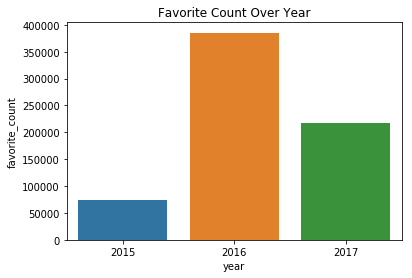

In [93]:
sns.barplot(data = df, x = 'year', y = 'favorite_count');
plt.title('Favorite Count Over Year');

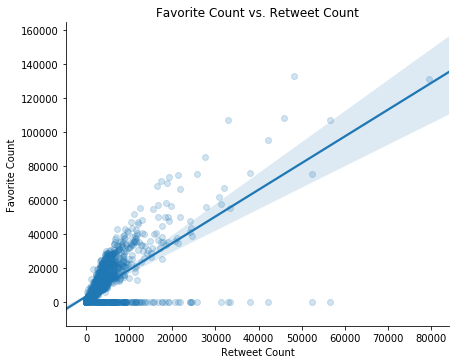

In [94]:
# Scatterplot of retweets vs favorite count

sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=twitter_data,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5});

plt.title('Favorite Count vs. Retweet Count');
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');

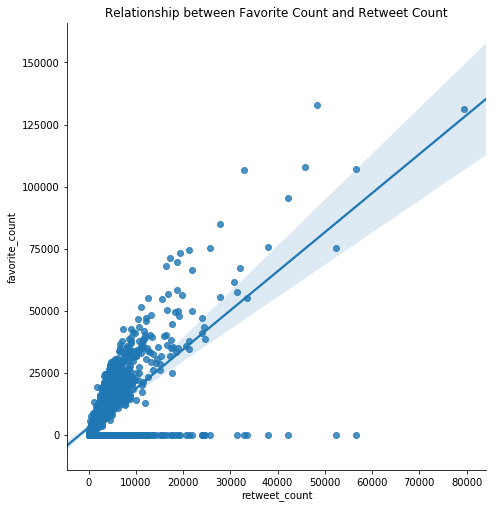

In [95]:
# Scatterplot of retweets vs favorite count
sns.lmplot(data = twitter_data ,x = 'retweet_count', y = 'favorite_count', size = 7);
plt.title('Relationship between Favorite Count and Retweet Count');

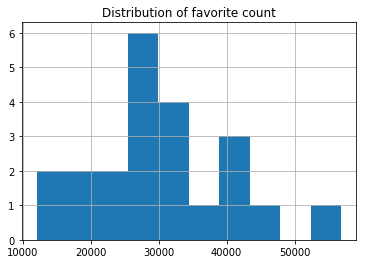

In [96]:
#histogram for distribution of likes
monthly_tweets.hist('favorite_count')
plt.title('Distribution of favorite count');

In [97]:
# Adding retweet_count to the monthly_tweets column
monthly_tweets['retweet_count'] = twitter_data.retweet_count

In [98]:
monthly_tweets.head()

,timestamp,tweet_id,year,favorite_count,retweet_count
0,2015-11-30,300,2015,39467,8853.0
1,2015-12-31,388,2015,33819,6514.0
2,2016-01-31,194,2016,25461,4328.0
3,2016-02-29,125,2016,42908,8964.0
4,2016-03-31,136,2016,41048,9774.0


In [99]:
# Changng the datatype of retweet_count from float to integer
monthly_tweets['retweet_count'] = monthly_tweets['retweet_count'].astype('int')

In [100]:
monthly_tweets.head()

,timestamp,tweet_id,year,favorite_count,retweet_count
0,2015-11-30,300,2015,39467,8853
1,2015-12-31,388,2015,33819,6514
2,2016-01-31,194,2016,25461,4328
3,2016-02-29,125,2016,42908,8964
4,2016-03-31,136,2016,41048,9774


In [101]:
# groupby year and retweeet_count to know the relationship between them
df_2 = monthly_tweets.groupby('year').sum()['retweet_count'].reset_index()

In [102]:
df_2

,year,retweet_count
0,2015,15367
1,2016,83394
2,2017,42302


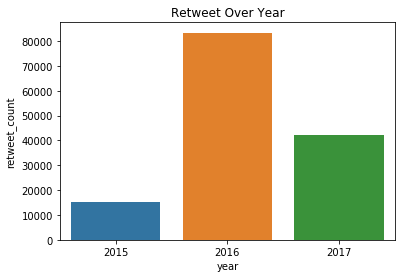

In [103]:
# Relationship betweeen 'retweet' and 'year'
sns.barplot(data = df_2, x = 'year', y = 'retweet_count');
plt.title('Retweet Over Year');

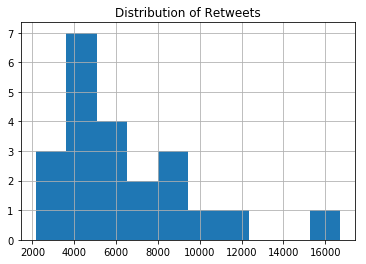

In [104]:
#histogram for distribution of retweets
monthly_tweets.hist('retweet_count')
plt.title('Distribution of Retweets');

### Insights:
This section provides an analysis of the data set, and corresponding visualizations to draw valuable conclusions.

1. The year with most likes is 2016 .

2. From the  Analysis, the number of likes increases, number of comments increases.

3. From the Analysis, 2016 has the most retweet

4. From the Analysis, the number of favorite(likes) were close to the number of retweet, so that is why the visualisation seems    to look the same.

5. The result from the Distribution of tweets, and that of Distribution of favorite count  indicates a right skew.

6. There is a very strong correlation of magnitude 0.70 which shows that,the higher the number of favorites(likes),the higher      the number of retweets